<a href="https://colab.research.google.com/github/nagwaelmobark/educational-reviews-imbalance-study/blob/main/notebooks/02_baseline_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🎯 Educational Reviews Imbalance Study
🔬 Notebook 02: Baseline Experiments

1️⃣ LOADING AND PREPARING DATA...
📁 Data loaded from GitHub
📊 Dataset shape: (107018, 3)

🧹 BASIC PREPROCESSING...
-------------------------
Removed 0 empty/missing reviews
Final dataset size: 107,018 reviews

📊 CLASS DISTRIBUTION:
-------------------------
Rating 1: 2,469 (2.31%)
Rating 2: 2,251 (2.10%)
Rating 3: 5,071 (4.74%)
Rating 4: 18,054 (16.87%)
Rating 5: 79,173 (73.98%)

2️⃣ CREATING TRAIN-TEST SPLIT...
Training set: 85,614 samples
Test set: 21,404 samples

📊 TRAIN SET DISTRIBUTION:
Rating 1: 1,975 (2.31%)
Rating 2: 1,801 (2.10%)
Rating 3: 4,057 (4.74%)
Rating 4: 14,443 (16.87%)
Rating 5: 63,338 (73.98%)

📊 TEST SET DISTRIBUTION:
Rating 1: 494 (2.31%)
Rating 2: 450 (2.10%)
Rating 3: 1,014 (4.74%)
Rating 4: 3,611 (16.87%)
Rating 5: 15,835 (73.98%)

3️⃣ FEATURE EXTRACTION...
🔤 Creating TF-IDF features...
Feature matrix shape: (85614, 10000)
Vocabulary size: 10000

🔍 TOP FEATURES PER CLASS:
---------------

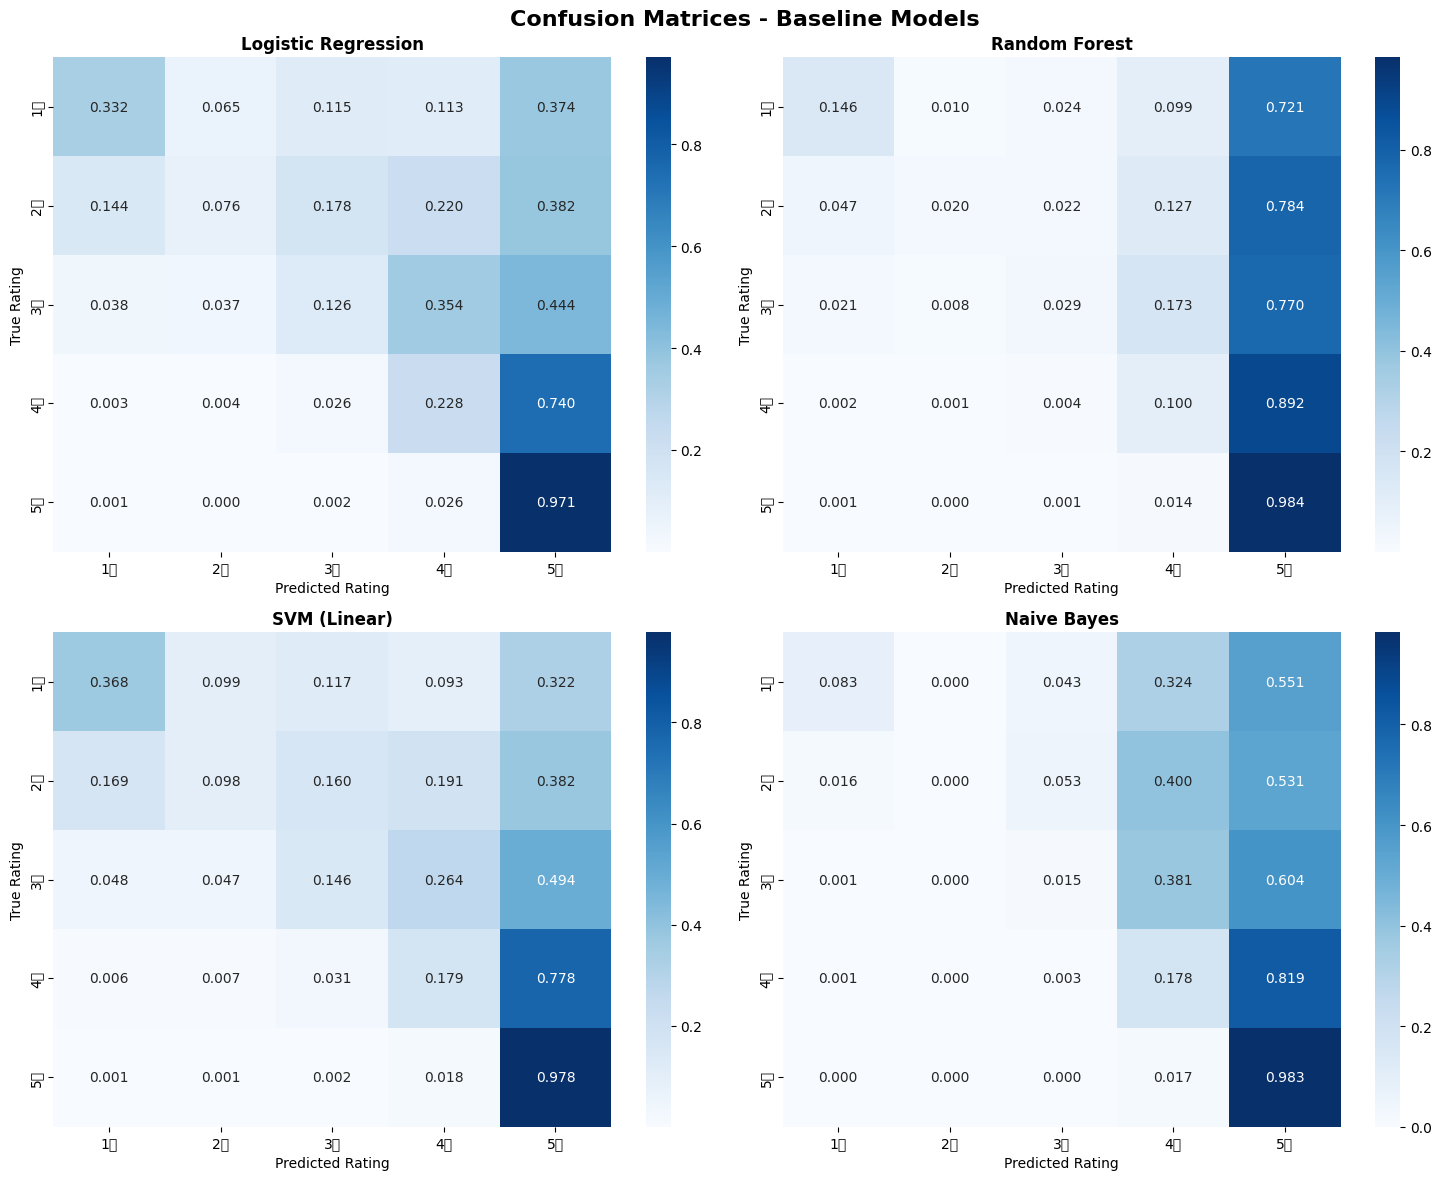


7️⃣ IMBALANCE IMPACT ANALYSIS...
🔍 PERFORMANCE vs CLASS FREQUENCY:
-----------------------------------
Rating 1⭐: 1,975 samples (2.3%) → F1: 0.308
Rating 2⭐: 1,801 samples (2.1%) → F1: 0.075
Rating 3⭐: 4,057 samples (4.7%) → F1: 0.117
Rating 4⭐: 14,443 samples (16.9%) → F1: 0.243
Rating 5⭐: 63,338 samples (74.0%) → F1: 0.878

8️⃣ CREATING PERFORMANCE VISUALIZATIONS...


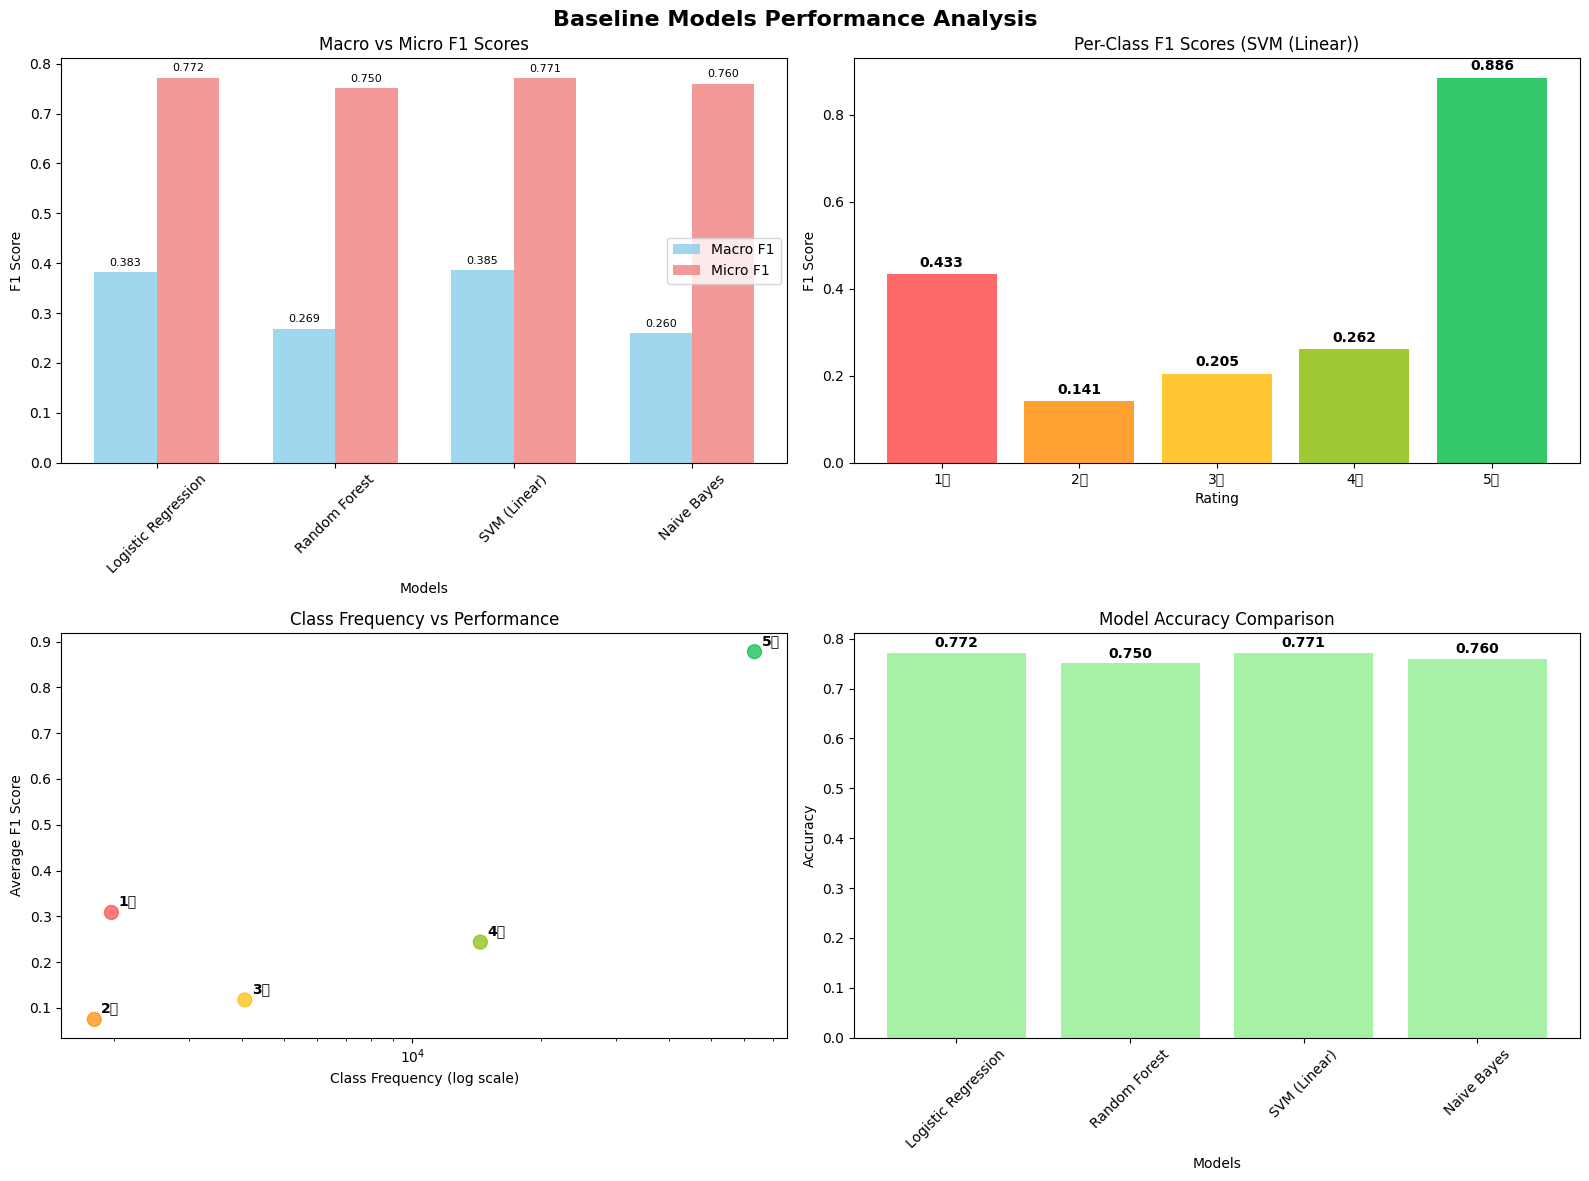


9️⃣ KEY FINDINGS AND PROBLEMS...
🔍 MAIN OBSERVATIONS:
-------------------------
1. 📊 High overall accuracy but poor minority class performance
   • Overall accuracy: 0.771
   • Minority classes (1-2⭐) avg F1: 0.191
   • Majority classes (4-5⭐) avg F1: 0.561
   • Performance gap: 0.369

2. 🎯 Class imbalance severely affects rare classes:
   • Rating 1⭐: 2.3% of data → F1: 0.308
   • Rating 2⭐: 2.1% of data → F1: 0.075

3. 🤖 Best performing model: SVM (Linear)
   • Macro F1: 0.3855
   • But struggles with minority classes!

⚠️ CRITICAL PROBLEMS IDENTIFIED:
-----------------------------------
❌ Models are biased toward majority classes
❌ Poor recall for negative reviews (1-2⭐)
❌ High accuracy is misleading due to class imbalance
❌ Important minority opinions are being missed

🚀 NEXT STEPS - IMBALANCE TECHNIQUES NEEDED:
---------------------------------------------
✅ SMOTE for synthetic minority samples
✅ Cost-sensitive learning with class weights
✅ Threshold optimization for better recal

In [3]:
# Educational Reviews Imbalance Study - Baseline Experiments
# Notebook 02: Baseline Classification Without Imbalance Handling
y_train = y_train.reset_index(drop=True)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support, f1_score
import warnings
warnings.filterwarnings('ignore')

print("🎯 Educational Reviews Imbalance Study")
print("=" * 50)
print("🔬 Notebook 02: Baseline Experiments")
print("=" * 50)

# =============================================================================
# 1. DATA LOADING AND PREPARATION
# =============================================================================

print("\n1️⃣ LOADING AND PREPARING DATA...")
print("=" * 40)

# Download data if running in Colab
try:
    import google.colab
    !wget -q https://raw.githubusercontent.com/nagwaelmobark/educational-reviews-imbalance-study/main/data/raw/reviews.csv
    df = pd.read_csv('reviews.csv')
    print("📁 Data loaded from GitHub")
except:
    # For local environment
    df = pd.read_csv('../data/raw/reviews.csv')
    print("📁 Data loaded locally")

print(f"📊 Dataset shape: {df.shape}")

# Basic preprocessing
print("\n🧹 BASIC PREPROCESSING...")
print("-" * 25)

# Remove any missing reviews
initial_size = len(df)
df = df.dropna(subset=['Review', 'Label'])
df = df[df['Review'].str.strip() != '']
print(f"Removed {initial_size - len(df)} empty/missing reviews")

# Convert reviews to string and basic cleaning
df['Review'] = df['Review'].astype(str)
df['Review_cleaned'] = df['Review'].str.lower().str.strip()

print(f"Final dataset size: {len(df):,} reviews")

# Show class distribution
print(f"\n📊 CLASS DISTRIBUTION:")
print("-" * 25)
class_counts = df['Label'].value_counts().sort_index()
for label, count in class_counts.items():
    percentage = (count / len(df)) * 100
    print(f"Rating {label}: {count:,} ({percentage:.2f}%)")

# =============================================================================
# 2. TRAIN-TEST SPLIT
# =============================================================================

print(f"\n2️⃣ CREATING TRAIN-TEST SPLIT...")
print("=" * 35)

# Stratified split to maintain class distribution
X = df['Review_cleaned']
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {len(X_train):,} samples")
print(f"Test set: {len(X_test):,} samples")

# Check if distribution is maintained
print(f"\n📊 TRAIN SET DISTRIBUTION:")
train_dist = y_train.value_counts().sort_index()
for label, count in train_dist.items():
    percentage = (count / len(y_train)) * 100
    print(f"Rating {label}: {count:,} ({percentage:.2f}%)")

print(f"\n📊 TEST SET DISTRIBUTION:")
test_dist = y_test.value_counts().sort_index()
for label, count in test_dist.items():
    percentage = (count / len(y_test)) * 100
    print(f"Rating {label}: {count:,} ({percentage:.2f}%)")

# =============================================================================
# 3. FEATURE EXTRACTION
# =============================================================================

print(f"\n3️⃣ FEATURE EXTRACTION...")
print("=" * 30)

# TF-IDF Vectorization
print("🔤 Creating TF-IDF features...")

# Try different configurations
vectorizers = {
    'TF-IDF (1-2 grams)': TfidfVectorizer(
        max_features=10000,
        ngram_range=(1, 2),
        stop_words='english',
        min_df=2,
        max_df=0.95
    ),
    'TF-IDF (1-3 grams)': TfidfVectorizer(
        max_features=10000,
        ngram_range=(1, 3),
        stop_words='english',
        min_df=2,
        max_df=0.95
    ),
    'Count Vectorizer': CountVectorizer(
        max_features=10000,
        ngram_range=(1, 2),
        stop_words='english',
        min_df=2,
        max_df=0.95
    )
}

# We'll use TF-IDF (1-2 grams) as our main feature extractor
main_vectorizer = vectorizers['TF-IDF (1-2 grams)']
X_train_tfidf = main_vectorizer.fit_transform(X_train)
X_test_tfidf = main_vectorizer.transform(X_test)

print(f"Feature matrix shape: {X_train_tfidf.shape}")
print(f"Vocabulary size: {len(main_vectorizer.vocabulary_)}")

# Show most important features per class
print(f"\n🔍 TOP FEATURES PER CLASS:")
print("-" * 30)

# Get feature names
feature_names = main_vectorizer.get_feature_names_out()

# Convert y_train to numpy array to avoid pandas issues
y_train_array = y_train.values

# For each class, find most discriminative features
for rating in sorted(df['Label'].unique()):
    # Get indices for this rating using numpy
    rating_indices = np.where(y_train_array == rating)[0]

    if len(rating_indices) > 0:
        # Calculate mean TF-IDF for this class
        class_tfidf = X_train_tfidf[rating_indices].mean(axis=0).A1

        # Get top features
        top_indices = class_tfidf.argsort()[-10:][::-1]
        top_features = [feature_names[i] for i in top_indices]

        print(f"Rating {rating}⭐: {', '.join(top_features[:5])}")

print("\n✅ Feature extraction completed successfully!")

# =============================================================================
# 4. BASELINE MODELS
# =============================================================================

print(f"\n4️⃣ TRAINING BASELINE MODELS...")
print("=" * 35)

# Define models to test
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'SVM (Linear)': SVC(kernel='linear', random_state=42, probability=True),
    'Naive Bayes': MultinomialNB()
}

# Store results
results = {}

print("🤖 Training models...")
for name, model in models.items():
    print(f"\n📈 Training {name}...")

    # Train model
    model.fit(X_train_tfidf, y_train)

    # Make predictions
    y_pred = model.predict(X_test_tfidf)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average=None)
    macro_f1 = f1_score(y_test, y_pred, average='macro')
    micro_f1 = f1_score(y_test, y_pred, average='micro')

    # Store results
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'support': support,
        'macro_f1': macro_f1,
        'micro_f1': micro_f1,
        'predictions': y_pred
    }

    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Macro F1: {macro_f1:.4f}")
    print(f"  Micro F1: {micro_f1:.4f}")

# =============================================================================
# 5. DETAILED RESULTS ANALYSIS
# =============================================================================

print(f"\n5️⃣ DETAILED RESULTS ANALYSIS...")
print("=" * 35)

# Create results summary table
print("📊 OVERALL PERFORMANCE SUMMARY:")
print("-" * 40)
print(f"{'Model':<20} {'Accuracy':<10} {'Macro F1':<10} {'Micro F1':<10}")
print("-" * 50)
for name, result in results.items():
    print(f"{name:<20} {result['accuracy']:<10.4f} {result['macro_f1']:<10.4f} {result['micro_f1']:<10.4f}")

# Per-class analysis for best model
best_model_name = max(results.keys(), key=lambda x: results[x]['macro_f1'])
best_result = results[best_model_name]

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"📊 PER-CLASS PERFORMANCE:")
print("-" * 30)
print(f"{'Rating':<8} {'Precision':<12} {'Recall':<10} {'F1-Score':<10} {'Support':<10}")
print("-" * 50)

for i, rating in enumerate(sorted(df['Label'].unique())):
    precision = best_result['precision'][i]
    recall = best_result['recall'][i]
    f1 = best_result['f1'][i]
    support = best_result['support'][i]

    print(f"{rating}⭐       {precision:<12.4f} {recall:<10.4f} {f1:<10.4f} {support:<10}")

# =============================================================================
# 6. CONFUSION MATRIX ANALYSIS
# =============================================================================

print(f"\n6️⃣ CONFUSION MATRIX ANALYSIS...")
print("=" * 35)

# Create confusion matrices for all models
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Confusion Matrices - Baseline Models', fontsize=16, fontweight='bold')

axes = axes.ravel()
for idx, (name, result) in enumerate(results.items()):
    if idx < 4:  # Show first 4 models
        cm = confusion_matrix(y_test, result['predictions'])

        # Normalize confusion matrix
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        # Plot
        sns.heatmap(cm_normalized, annot=True, fmt='.3f', cmap='Blues',
                   xticklabels=[f'{i}⭐' for i in range(1, 6)],
                   yticklabels=[f'{i}⭐' for i in range(1, 6)],
                   ax=axes[idx])
        axes[idx].set_title(f'{name}', fontweight='bold')
        axes[idx].set_xlabel('Predicted Rating')
        axes[idx].set_ylabel('True Rating')

plt.tight_layout()
plt.show()

# =============================================================================
# 7. IMBALANCE IMPACT ANALYSIS
# =============================================================================

print(f"\n7️⃣ IMBALANCE IMPACT ANALYSIS...")
print("=" * 35)

# Analyze performance by class frequency
print("🔍 PERFORMANCE vs CLASS FREQUENCY:")
print("-" * 35)

class_freq = y_train.value_counts().sort_index()
class_performance = {}

for i, rating in enumerate(sorted(df['Label'].unique())):
    freq = class_freq[rating]
    freq_pct = (freq / len(y_train)) * 100

    # Get average performance across all models for this class
    avg_precision = np.mean([results[model]['precision'][i] for model in results.keys()])
    avg_recall = np.mean([results[model]['recall'][i] for model in results.keys()])
    avg_f1 = np.mean([results[model]['f1'][i] for model in results.keys()])

    class_performance[rating] = {
        'frequency': freq,
        'frequency_pct': freq_pct,
        'avg_precision': avg_precision,
        'avg_recall': avg_recall,
        'avg_f1': avg_f1
    }

    print(f"Rating {rating}⭐: {freq:,} samples ({freq_pct:.1f}%) → F1: {avg_f1:.3f}")

# =============================================================================
# 8. VISUALIZATION OF RESULTS
# =============================================================================

print(f"\n8️⃣ CREATING PERFORMANCE VISUALIZATIONS...")
print("=" * 40)

# Create comprehensive results visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Baseline Models Performance Analysis', fontsize=16, fontweight='bold')

# 1. Overall F1 Scores Comparison
ax1 = axes[0, 0]
model_names = list(results.keys())
macro_f1_scores = [results[model]['macro_f1'] for model in model_names]
micro_f1_scores = [results[model]['micro_f1'] for model in model_names]

x = np.arange(len(model_names))
width = 0.35

bars1 = ax1.bar(x - width/2, macro_f1_scores, width, label='Macro F1', alpha=0.8, color='skyblue')
bars2 = ax1.bar(x + width/2, micro_f1_scores, width, label='Micro F1', alpha=0.8, color='lightcoral')

ax1.set_xlabel('Models')
ax1.set_ylabel('F1 Score')
ax1.set_title('Macro vs Micro F1 Scores')
ax1.set_xticks(x)
ax1.set_xticklabels(model_names, rotation=45)
ax1.legend()

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

# 2. Per-Class F1 Scores (Best Model)
ax2 = axes[0, 1]
ratings = sorted(df['Label'].unique())
f1_scores = best_result['f1']
colors = ['#ff4444', '#ff8800', '#ffbb00', '#88bb00', '#00bb44']

bars = ax2.bar([f'{r}⭐' for r in ratings], f1_scores, color=colors, alpha=0.8)
ax2.set_xlabel('Rating')
ax2.set_ylabel('F1 Score')
ax2.set_title(f'Per-Class F1 Scores ({best_model_name})')

# Add value labels
for bar, score in zip(bars, f1_scores):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

# 3. Class Frequency vs Performance
ax3 = axes[1, 0]
frequencies = [class_performance[r]['frequency'] for r in ratings]
avg_f1_by_class = [class_performance[r]['avg_f1'] for r in ratings]

scatter = ax3.scatter(frequencies, avg_f1_by_class, c=colors, s=100, alpha=0.7)
ax3.set_xlabel('Class Frequency (log scale)')
ax3.set_ylabel('Average F1 Score')
ax3.set_title('Class Frequency vs Performance')
ax3.set_xscale('log')

# Add rating labels
for i, rating in enumerate(ratings):
    ax3.annotate(f'{rating}⭐',
                (frequencies[i], avg_f1_by_class[i]),
                xytext=(5, 5), textcoords='offset points',
                fontweight='bold')

# 4. Model Accuracy Comparison
ax4 = axes[1, 1]
accuracies = [results[model]['accuracy'] for model in model_names]
bars = ax4.bar(model_names, accuracies, color='lightgreen', alpha=0.8)
ax4.set_xlabel('Models')
ax4.set_ylabel('Accuracy')
ax4.set_title('Model Accuracy Comparison')
ax4.set_xticklabels(model_names, rotation=45)

# Add value labels
for bar, acc in zip(bars, accuracies):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
             f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# =============================================================================
# 9. KEY FINDINGS AND PROBLEMS
# =============================================================================

print(f"\n9️⃣ KEY FINDINGS AND PROBLEMS...")
print("=" * 35)

print("🔍 MAIN OBSERVATIONS:")
print("-" * 25)

# Calculate imbalance impact
minority_classes_f1 = np.mean([class_performance[1]['avg_f1'], class_performance[2]['avg_f1']])
majority_classes_f1 = np.mean([class_performance[4]['avg_f1'], class_performance[5]['avg_f1']])
performance_gap = majority_classes_f1 - minority_classes_f1

print(f"1. 📊 High overall accuracy but poor minority class performance")
print(f"   • Overall accuracy: {results[best_model_name]['accuracy']:.3f}")
print(f"   • Minority classes (1-2⭐) avg F1: {minority_classes_f1:.3f}")
print(f"   • Majority classes (4-5⭐) avg F1: {majority_classes_f1:.3f}")
print(f"   • Performance gap: {performance_gap:.3f}")

print(f"\n2. 🎯 Class imbalance severely affects rare classes:")
for rating in [1, 2]:
    freq_pct = class_performance[rating]['frequency_pct']
    f1 = class_performance[rating]['avg_f1']
    print(f"   • Rating {rating}⭐: {freq_pct:.1f}% of data → F1: {f1:.3f}")

print(f"\n3. 🤖 Best performing model: {best_model_name}")
print(f"   • Macro F1: {best_result['macro_f1']:.4f}")
print(f"   • But struggles with minority classes!")

print(f"\n⚠️ CRITICAL PROBLEMS IDENTIFIED:")
print("-" * 35)
print("❌ Models are biased toward majority classes")
print("❌ Poor recall for negative reviews (1-2⭐)")
print("❌ High accuracy is misleading due to class imbalance")
print("❌ Important minority opinions are being missed")

print(f"\n🚀 NEXT STEPS - IMBALANCE TECHNIQUES NEEDED:")
print("-" * 45)
print("✅ SMOTE for synthetic minority samples")
print("✅ Cost-sensitive learning with class weights")
print("✅ Threshold optimization for better recall")
print("✅ Ensemble methods for balanced predictions")
print("✅ Advanced sampling techniques")

print(f"\n📊 TARGET IMPROVEMENTS:")
print("-" * 25)
print(f"🎯 Increase minority class F1 from {minority_classes_f1:.3f} to >0.400")
print(f"🎯 Reduce performance gap from {performance_gap:.3f} to <0.200")
print(f"🎯 Maintain reasonable overall performance")

print(f"\n🔬 READY FOR IMBALANCE TECHNIQUES!")
print("   Next notebook: 03_imbalance_techniques.ipynb")
print("=" * 50)

# Save predictions for later analysis
print(f"\n💾 SAVING BASELINE RESULTS...")
baseline_results = {
    'best_model': best_model_name,
    'best_predictions': best_result['predictions'],
    'y_test': y_test.values,
    'performance_summary': {model: {'accuracy': results[model]['accuracy'],
                                   'macro_f1': results[model]['macro_f1']}
                           for model in results.keys()}
}

print(f"✅ Baseline results ready for comparison with imbalance techniques!")
print(f"📈 Current best Macro F1: {best_result['macro_f1']:.4f}")
print(f"🎯 Goal: Improve minority class performance significantly!")